In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Setup & Image Loading

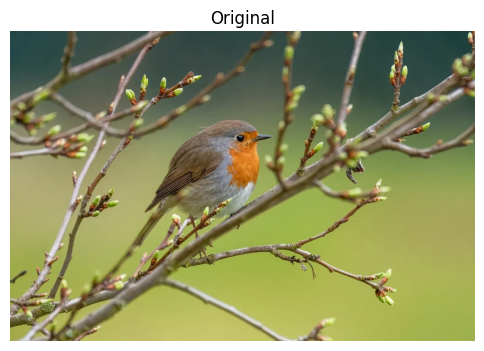

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# 1️⃣ Upload your image via the Kaggle “Add data” panel,
# then load it. For example:
img_bgr = cv2.imread('/kaggle/input/image-1/image_1.webp')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display utility
def show(img, title=''):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray' if len(img.shape)==2 else None)
    plt.title(title)
    plt.axis('off')
    
show(img_rgb, 'Original')


# 2. Grayscale Conversion

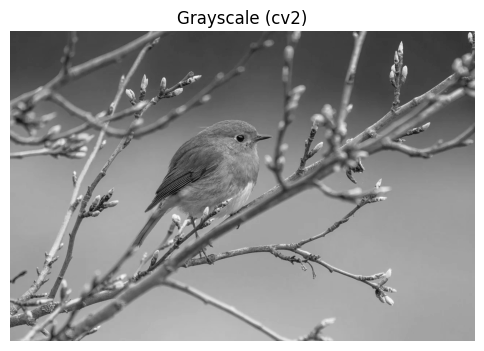

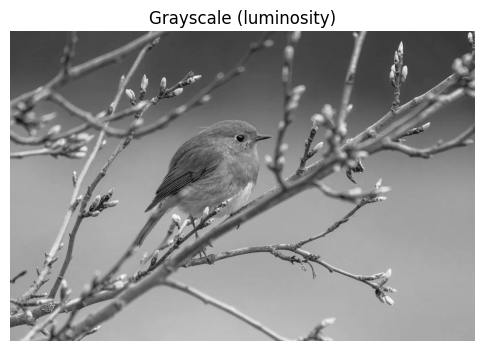

In [2]:
# Method A: OpenCV built‑in
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Method B: Luminosity
r, g, b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
lum = (0.21*r + 0.72*g + 0.07*b).astype(np.uint8)

show(gray, 'Grayscale (cv2)')
show(lum,   'Grayscale (luminosity)')


# 3. Image Negative

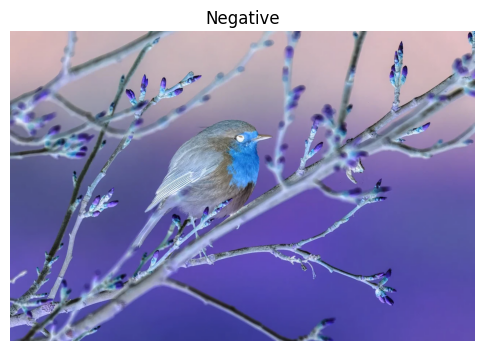

In [3]:
neg = 255 - img_rgb
show(neg, 'Negative')


# 4. Brightness Adjustment



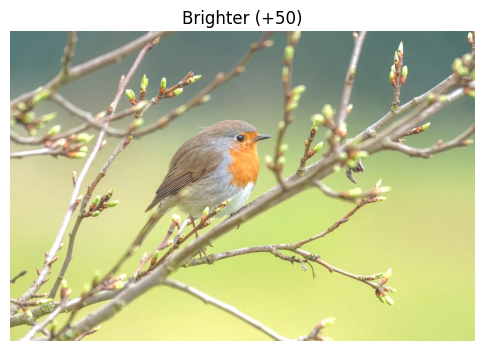

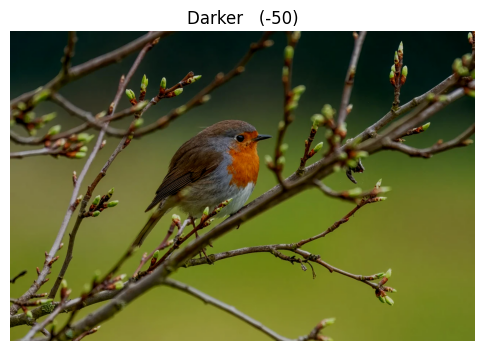

In [4]:
def adjust_brightness(img, delta):
    # delta can be positive or negative
    tmp = img.astype(int) + delta
    tmp = np.clip(tmp, 0, 255).astype(np.uint8)
    return tmp

bright  = adjust_brightness(img_rgb, +50)
dark    = adjust_brightness(img_rgb, -50)
show(bright, 'Brighter (+50)')
show(dark,   'Darker   (-50)')


# 5. Black-and‑White

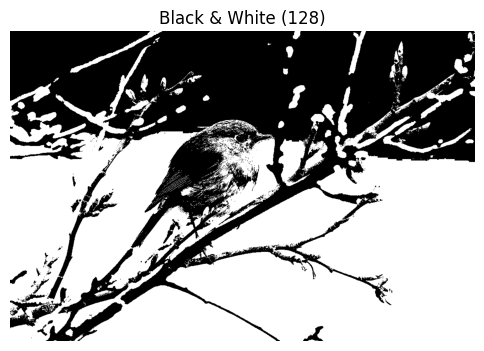

In [5]:
# Use the grayscale from step 2:
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
show(bw, 'Black & White (128)')


# 6. Image Resizing

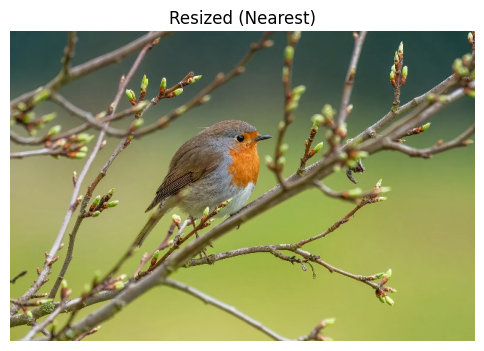

In [8]:
# Nearest‑neighbor scaling to half size
h, w = img_rgb.shape[:2]
resized = cv2.resize(img_rgb, (w//2, h//2), interpolation=cv2.INTER_NEAREST)
show(resized, 'Resized (Nearest)')
